https://docs.ultralytics.com/modes/predict/#key-features-of-predict-mode

https://medium.com/@Mert.A/how-to-use-yolov9-for-object-detection-93598ad88d7d

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import cv2
from PIL import Image

import ultralytics
from ultralytics import YOLO

In [5]:
ultralytics.__version__

'8.2.38'

In [6]:
model = YOLO("yolov9c.pt")

100%|█████████████████████████████████████████████████████████████████████████████| 49.4M/49.4M [00:08<00:00, 5.82MB/s]


In [10]:
os.chdir("C://Users//arvin//MLProjectsFolder/RoadSeg")
os.getcwd()

'C:\\Users\\arvin\\MLProjectsFolder\\RoadSeg'

In [12]:
print(list(os.listdir("CamVid/train")).remove(".ipynb_checkpoints"))

None


In [17]:
names = os.listdir("CamVid/train")
if(".ipynb_checkpoints") in names:
    names.remove(".ipynb_checkpoints")
names

['0001TP_009210.png',
 '0001TP_009240.png',
 '0001TP_009390.png',
 '0001TP_009420.png',
 '0001TP_009450.png',
 '0001TP_009480.png',
 '0001TP_009510.png',
 '0001TP_009540.png',
 '0001TP_009690.png',
 '0001TP_009720.png',
 '0001TP_009750.png',
 '0001TP_009780.png',
 '0001TP_009810.png',
 '0001TP_009840.png',
 '0001TP_009990.png',
 '0001TP_010020.png',
 '0001TP_010050.png',
 '0001TP_010080.png',
 '0001TP_010110.png',
 '0001TP_010140.png',
 '0001TP_010290.png',
 '0001TP_010320.png',
 '0001TP_010350.png',
 '0001TP_010380.png',
 '0006R0_f00930.png',
 '0006R0_f00960.png',
 '0006R0_f01110.png',
 '0006R0_f01140.png',
 '0006R0_f01170.png',
 '0006R0_f01200.png',
 '0006R0_f01230.png',
 '0006R0_f01260.png',
 '0006R0_f01410.png',
 '0006R0_f01440.png',
 '0006R0_f01470.png',
 '0006R0_f01500.png',
 '0006R0_f01530.png',
 '0006R0_f01560.png',
 '0006R0_f01710.png',
 '0006R0_f01740.png',
 '0006R0_f01770.png',
 '0006R0_f01800.png',
 '0006R0_f01830.png',
 '0006R0_f01860.png',
 '0006R0_f02010.png',
 '0006R0_f

In [37]:
img = np.array(Image.open(("CamVid/train/0001TP_009210.png")))
# img = np.resize(img,(640,640))
print(img.shape)
img = img[40:-40,(int)((960-640)/2):(int)(-1*((960-640)/2))]
img.shape

(720, 960, 3)


(640, 640, 3)

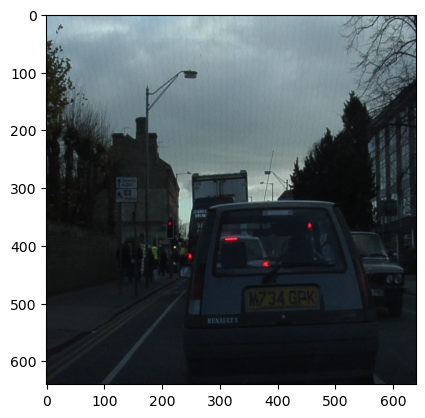

In [38]:
plt.imshow(img)

In [53]:
results = model.predict("CamVid/train/0001TP_009210.png", conf = 0.5)


image 1/1 C:\Users\arvin\MLProjectsFolder\RoadSeg\CamVid\train\0001TP_009210.png: 480x640 1 person, 2 cars, 1 traffic light, 283.1ms
Speed: 10.1ms preprocess, 283.1ms inference, 16.4ms postprocess per image at shape (1, 3, 480, 640)


In [54]:
type(results[0])

ultralytics.engine.results.Results

In [55]:
len(results)

1

In [56]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [59]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    # result.save(filename="result.jpg")  # save to disk